## Evaluating Clustering Algorithms - Extrinsic Metrics

### Contingency Matrix

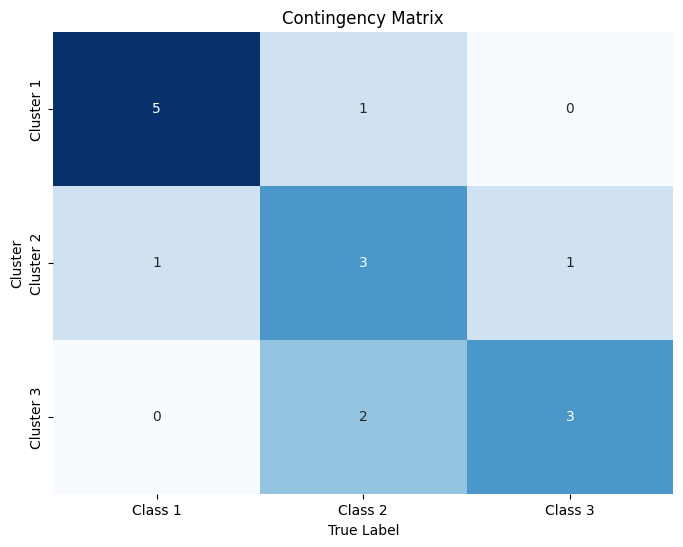

True Label  Class 1  Class 2  Class 3
Cluster                              
Cluster 1         5        1        0
Cluster 2         1        3        1
Cluster 3         0        2        3


In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset creation based on the provided contingency matrix
data = {
    "Cluster": ["Cluster 1"] * 5 + ["Cluster 1"] * 1 + ["Cluster 2"] * 1 + ["Cluster 2"] * 3 + ["Cluster 2"] * 1 + ["Cluster 3"] * 2 + ["Cluster 3"] * 3,
    "True Label": ["Class 1"] * 5 + ["Class 2"] * 1 + ["Class 1"] * 1 + ["Class 2"] * 3 + ["Class 3"] * 1 + ["Class 2"] * 2 + ["Class 3"] * 3
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display contingency matrix (confusion matrix) using sklearn and seaborn
def display_contingency_matrix(df, cluster_column, label_column):
    # Generate contingency matrix
    contingency = pd.crosstab(df[cluster_column], df[label_column])
    
    # Plot the contingency matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(contingency, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Contingency Matrix")
    plt.xlabel("True Label")
    plt.ylabel("Cluster")
    plt.show()
    
    return contingency

# Call the function and display the contingency matrix
contingency_matrix_result = display_contingency_matrix(df, "Cluster", "True Label")
print(contingency_matrix_result)


### Purity

In [2]:
# Function to calculate and print purity for each cluster and overall purity
def calculate_purity(df, cluster_column, label_column):
    # Generate the contingency matrix
    contingency = pd.crosstab(df[cluster_column], df[label_column])
    
    # Initialize variables for calculating overall purity
    total_points = len(df)
    weighted_purity_sum = 0

    print("Purity of each cluster:")
    
    # Calculate purity for each cluster
    for cluster, row in contingency.iterrows():
        cluster_size = row.sum()
        max_class_count = row.max()
        cluster_purity = max_class_count / cluster_size
        weighted_purity_sum += max_class_count
        print(f"{cluster}: {cluster_purity:.4f}")
    
    # Calculate overall purity
    overall_purity = weighted_purity_sum / total_points
    print(f"\nOverall Purity: {overall_purity:.4f}")

# Call the function with the generated dataset
calculate_purity(df, "Cluster", "True Label")


Purity of each cluster:
Cluster 1: 0.8333
Cluster 2: 0.6000
Cluster 3: 0.6000

Overall Purity: 0.6875


### Rand Index

In [4]:
import pandas as pd
from scipy.special import comb

# Function to calculate and print Rand Index for clustering
def calculate_rand_index(df, cluster_column, label_column):
    # Generate the contingency matrix
    contingency = pd.crosstab(df[cluster_column], df[label_column])
    
    # Total number of data points
    total_points = len(df)
    total_pairs = comb(total_points, 2)
    
    # Calculate True Positives (TP): Pairs in the same cluster and same class
    tp = sum(comb(n_ij, 2) for n_ij in contingency.values.flatten() if n_ij >= 2)
    
    # Calculate pairs within the same cluster (regardless of class) for False Positives (FP)
    sum_ai_2 = sum(comb(row_sum, 2) for row_sum in contingency.sum(axis=1) if row_sum >= 2)
    fp = sum_ai_2 - tp  # FP are same-cluster, different-class pairs
    
    # Calculate pairs within the same class (regardless of cluster) for False Negatives (FN)
    sum_bj_2 = sum(comb(col_sum, 2) for col_sum in contingency.sum(axis=0) if col_sum >= 2)
    fn = sum_bj_2 - tp  # FN are same-class, different-cluster pairs
    
    # True Negatives (TN): Pairs in different clusters and different classes
    tn = total_pairs - (tp + fp + fn)
    
    # Calculate the Rand Index
    rand_index = (tp + tn) / total_pairs
    
    print(f"Rand Index: {rand_index:.4f}")

# Call the function with the generated dataset
calculate_rand_index(df, "Cluster", "True Label")

Rand Index: 0.6917


### Adjusted Rand Index

In [3]:
import pandas as pd
from scipy.special import comb

# Sample dataset creation based on the provided contingency matrix
data = {
    "Cluster": ["Cluster 1"] * 5 + ["Cluster 1"] * 1 + ["Cluster 2"] * 1 + ["Cluster 2"] * 3 + ["Cluster 2"] * 1 + ["Cluster 3"] * 2 + ["Cluster 3"] * 3,
    "True Label": ["Class 1"] * 5 + ["Class 2"] * 1 + ["Class 1"] * 1 + ["Class 2"] * 3 + ["Class 3"] * 1 + ["Class 2"] * 2 + ["Class 3"] * 3
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Function to calculate and print Adjusted Rand Index (ARI) for clustering
def calculate_ari(df, cluster_column, label_column):
    # Generate the contingency matrix
    contingency = pd.crosstab(df[cluster_column], df[label_column])
    
    # Total number of data points
    total_points = len(df)
    total_pairs = comb(total_points, 2)
    
    # Calculate each component for the ARI formula
    sum_nij_2 = sum(comb(n_ij, 2) for n_ij in contingency.values.flatten() if n_ij >= 2)
    sum_ai_2 = sum(comb(row_sum, 2) for row_sum in contingency.sum(axis=1) if row_sum >= 2)
    sum_bj_2 = sum(comb(col_sum, 2) for col_sum in contingency.sum(axis=0) if col_sum >= 2)
    
    # Expected index calculation
    expected_index = (sum_ai_2 * sum_bj_2) / total_pairs
    
    # Calculate the ARI numerator and denominator
    numerator = sum_nij_2 - expected_index
    denominator = 0.5 * (sum_ai_2 + sum_bj_2) - expected_index
    
    # Adjusted Rand Index
    ari = numerator / denominator if denominator != 0 else 1.0
    
    print(f"Adjusted Rand Index (ARI): {ari:.4f}")

# Call the function with the generated dataset
calculate_ari(df, "Cluster", "True Label")


Adjusted Rand Index (ARI): 0.2600


### Normalized Mutual Information

In [5]:
import pandas as pd
import numpy as np

# Sample dataset creation based on the provided contingency matrix
data = {
    "Cluster": ["Cluster 1"] * 5 + ["Cluster 1"] * 1 + ["Cluster 2"] * 1 + ["Cluster 2"] * 3 + ["Cluster 2"] * 1 + ["Cluster 3"] * 2 + ["Cluster 3"] * 3,
    "True Label": ["Class 1"] * 5 + ["Class 2"] * 1 + ["Class 1"] * 1 + ["Class 2"] * 3 + ["Class 3"] * 1 + ["Class 2"] * 2 + ["Class 3"] * 3
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Function to calculate and print Normalized Mutual Information (NMI) for clustering
def calculate_nmi(df, cluster_column, label_column):
    # Generate the contingency matrix
    contingency = pd.crosstab(df[cluster_column], df[label_column])
    
    # Total number of data points
    total_points = len(df)
    
    # Calculate Mutual Information (MI)
    mi = 0
    for i in range(contingency.shape[0]):
        for j in range(contingency.shape[1]):
            n_ij = contingency.iat[i, j]
            if n_ij > 0:
                n_i = contingency.iloc[i].sum()
                n_j = contingency.iloc[:, j].sum()
                mi += (n_ij / total_points) * np.log((n_ij * total_points) / (n_i * n_j))
    
    # Calculate Entropy H(U) for clusters
    h_u = -sum((contingency.iloc[i].sum() / total_points) * np.log(contingency.iloc[i].sum() / total_points)
               for i in range(contingency.shape[0]) if contingency.iloc[i].sum() > 0)
    
    # Calculate Entropy H(V) for true labels
    h_v = -sum((contingency.iloc[:, j].sum() / total_points) * np.log(contingency.iloc[:, j].sum() / total_points)
               for j in range(contingency.shape[1]) if contingency.iloc[:, j].sum() > 0)
    
    # Calculate Normalized Mutual Information (NMI)
    nmi = (2 * mi) / (h_u + h_v) if (h_u + h_v) > 0 else 1.0
    
    print(f"Normalized Mutual Information (NMI): {nmi:.4f}")

# Call the function with the generated dataset
calculate_nmi(df, "Cluster", "True Label")


Normalized Mutual Information (NMI): 0.3730
